In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# The Student's $t$ distribution and its properties

The Student's $t$ distribution is defined as: $$f(t|\nu) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\pi \nu}\Gamma(\frac{\nu}{2})} \left[ 1+ \left(\frac{t^2}{\nu} \right) \right]^{\frac{-(\nu+1)}{2}}$$ where $\nu$ is the number of degrees of freedom.  The PDF is similar to the Gaussian PDF, but with wider tails.  Here is the documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

Let's look at a few examples.

In [2]:
xmax  = 5
xgrid = np.linspace(-xmax, xmax, 100)

t1pdf  = stats.t.pdf(xgrid, 1)
t3pdf  = stats.t.pdf(xgrid, 3)
t10pdf = stats.t.pdf(xgrid, 10)

normpdf = stats.norm.pdf(xgrid, loc=0, scale=1)

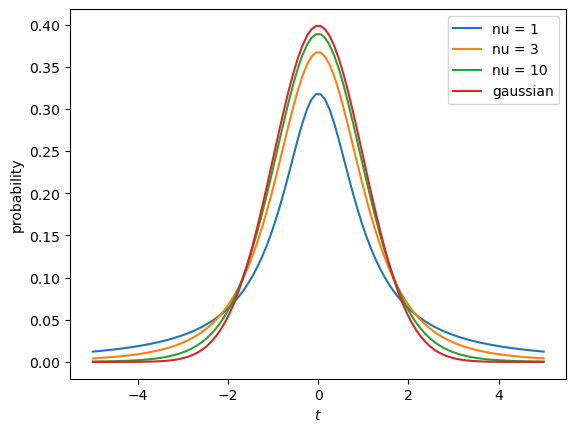

In [3]:
plt.plot(xgrid, t1pdf, label='nu = 1')
plt.plot(xgrid, t3pdf, label='nu = 3')
plt.plot(xgrid, t10pdf, label='nu = 10')
plt.plot(xgrid, normpdf, label='gaussian')
plt.xlabel('$t$')
plt.ylabel('probability')
plt.legend()

The variable $$T = \frac{Z}{\sqrt{X/\nu}}$$ is distributed according to the $t$ distribution. Here $Z$ is a standard gaussian variable $\mathcal{N}(0,1)$ and $X$ is another variable that is distributed according to $\chi^2$ with $\nu$ degrees of freedom.

This can be used to characterize the distribution of: $$T = \frac{(\bar{X}-\mu)}{(S/\sqrt{n})}$$ by identifying $$Z = \frac{(\bar{X}-\mu)}{(\sigma/\sqrt{n})}$$ which is distributed according to $\mathcal{N}(0,1)$ and $$X = (n-1)\frac{S^2}{\sigma^2}$$ which is distributed according to $\chi^2$ with $(n-1)$ degrees of freedom.  Therefore, $$T = \frac{(\bar{X}-\mu)}{(S/\sqrt{n})}$$ is distributed according to Student's $t$ with $(n-1)$ degrees of freedom.

It is useful for comparing a dataset with a distribution with known $\mu$ but unknown variance $\sigma^2$.

Let's empirically show this distribution through an example.

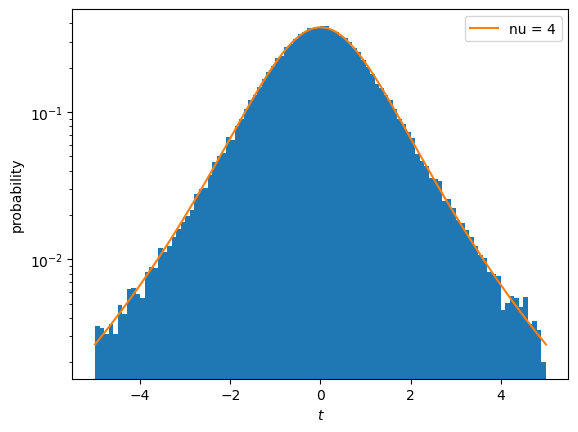

In [4]:
mu  = 5.0   # parent population mean
sig = 2.0   # parent population standard deviation

# Let's draw this many random numbers each simulation.
n  = 5

# and many simulations so we can plot the distribution.
nsims = 100000

tvals = np.zeros(nsims)
for i in range(nsims):
    x = np.random.normal(loc=mu, scale=sig, size=n)
    meanx = np.mean(x)
    s = np.sqrt(x.var(ddof=1))
    tvals[i] = (meanx-mu)*np.sqrt(n)/s

# plot the histogram of the nsims realizations
xmax = 5  # x axis to 3 times the mean (=nu)
a,b,c = plt.hist(tvals, range=[-xmax, xmax], bins=100, density=True)

# and overplot the theoretical Student's t distribution with
# nu-1 degrees of freedom
xgrid = np.linspace(-xmax, xmax, 100)
tpdf = stats.t.pdf(xgrid, n-1)
plt.plot(xgrid, tpdf, label='nu = %d' % (n-1))
plt.xlabel('$t$')
plt.ylabel('probability')
plt.yscale('log')
plt.legend()

According to the **central limit theorem**, the $t$ distibution approaches a gaussian at large values of $\nu$.

In [5]:
t20pdf = stats.t.pdf(xgrid, 20)
normpdf = stats.norm.pdf(xgrid, loc=0, scale=1)

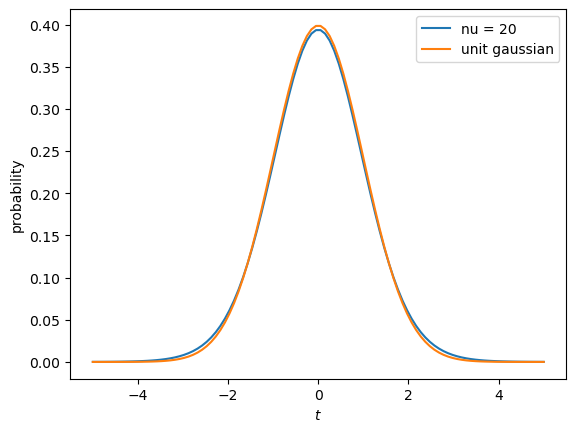

In [6]:
plt.plot(xgrid, t20pdf, label='nu = 20')
plt.plot(xgrid, normpdf, label='unit gaussian')
plt.xlabel('$t$')
plt.ylabel('probability')
plt.legend()

One caution is that although the PDFs look similar, their values are quite different in the wings.

In [7]:
t50pdf = stats.t.pdf(xgrid, 50)
t100pdf = stats.t.pdf(xgrid, 100)
t1000pdf = stats.t.pdf(xgrid, 1000)
normpdf = stats.norm.pdf(xgrid, loc=0, scale=1)

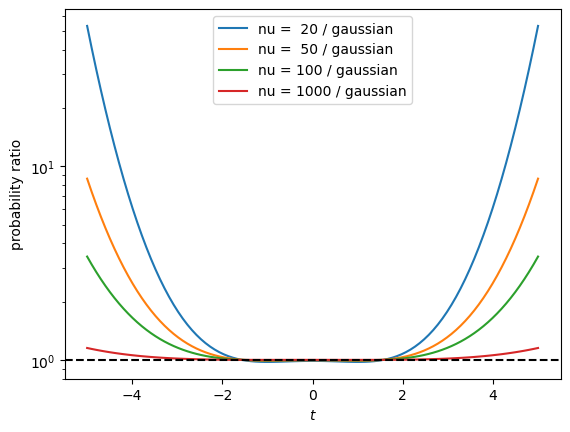

In [8]:
plt.plot(xgrid, t20pdf/normpdf, label='nu =  20 / gaussian')
plt.plot(xgrid, t50pdf/normpdf, label='nu =  50 / gaussian')
plt.plot(xgrid, t100pdf/normpdf, label='nu = 100 / gaussian')
plt.plot(xgrid, t1000pdf/normpdf, label='nu = 1000 / gaussian')
plt.axhline(y=1, ls='--', c='k')
plt.xlabel('$t$')
plt.ylabel('probability ratio')
plt.yscale('log')
plt.legend()

The $t$ value is analogous to the gaussian $\sigma$.  The probabilities contained inside, for example, $\pm 1t, 2t,$ etc are slightly different and depends also on $\nu$.  Probabilities can be computed with the `cdf` method.

In [9]:
print("probability inside +/- 1t: ", stats.t.cdf(1, 5) - stats.t.cdf(-1, 5))
print("probability inside +/- 2t: ", stats.t.cdf(2, 5) - stats.t.cdf(-2, 5))
print("probability inside +/- 3t: ", stats.t.cdf(3, 5) - stats.t.cdf(-3, 5))
print("probability inside +/- 3t: ", stats.t.cdf(5, 5) - stats.t.cdf(-5, 5))

probability inside +/- 1t:  0.6367825323508773
probability inside +/- 2t:  0.8980605211701418
probability inside +/- 3t:  0.9699007521025375
probability inside +/- 3t:  0.9958952840199466


Compare to gaussians:

In [10]:
print("probability inside +/- 1t: ", stats.norm.cdf(1) - stats.norm.cdf(-1))
print("probability inside +/- 2t: ", stats.norm.cdf(2) - stats.norm.cdf(-2))
print("probability inside +/- 3t: ", stats.norm.cdf(3) - stats.norm.cdf(-3))
print("probability inside +/- 3t: ", stats.norm.cdf(5) - stats.norm.cdf(-5))

probability inside +/- 1t:  0.6826894921370859
probability inside +/- 2t:  0.9544997361036416
probability inside +/- 3t:  0.9973002039367398
probability inside +/- 3t:  0.9999994266968562


For the example discussed in class, the probability of obtaining by chance $t \ge 3.045$ with $\nu = 15$ degrees of freedom is given by:

In [11]:
t  = 3.045
nu = 15
1-stats.t.cdf(t, 15)

0.004093262766528105